## 3. Machine learning for classification

+ Imagine, if customers of a Telecom company are planning to leave their services or stop using services of the company and go to other company. This is called churning.

+ We can classify customers in such situation as how high the probability is that this customer will churn? e.g., we can classify them based on the probability of churning.

+ After evaluating the highly likelihood of customer churning the company, we want to send them promotional emails where they can re-evaluate their decision of churning.

+ But we don’t want to send promotional discount to those customers who are not going to churn. At the same time, we also don’t want to miss out on those customers who are definitely going to churn.

+ In this case scenario, we will apply Binary classification:

$$
    g_{(X_i)} \backsim\backsim   y_{i}
$$
    
   
    
+ This is the formula for one single observation. ${X_i}$ can be one ${i th}$ customer. $y{i}$ will tell us if this customer left us or not. In this case **y** can take two values: 1 (customer churned), 0 (customer did not churn).

     + 0 = positive = Not churned
     + 1 = negative = churned

+ The output of our model will be a number between 0 & 1. 

+ Taking an example from previous lessons, if a customer left, we can label them as 1 and 0 when they did not leave. So target labels will consist of 0,1.

+ X as the feature matrix will consist of information like what kind of contract customer has, how long have they been with company, demographics etc. This information can be used to determine what features will lead to churning.

+ We will start with this dataset:

### 3.1 load data

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
!wget $data

--2022-09-26 20:39:27--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'WA_Fn-UseC_-Telco-Customer-Churn.csv.12'

     0K .......... .......... .......... .......... ..........  5% 1,16M 1s
    50K .......... .......... .......... .......... .......... 10% 1,59M 1s
   100K .......... .......... .......... .......... .......... 15% 1,29M 1s
   150K .......... .......... .......... .......... .......... 20% 1,81M 1s
   200K .......... .......... .......... .......... .......... 26% 1,47M 0s
   250K .......... .......... .......... .......... .......... 31% 2,52M 0s
   30

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

<IPython.core.display.Javascript object>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# to take a look at all of the columns at the same time, use transpose
df.head().T # columns become rows

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


**target variable is 'churn'**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 3.2 Data preparation

In [7]:
# preparing data

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# as feature like 'TotalCharges' should be integer
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# there are missing values so fill them with zeros (although not the best practice but it's alright most of the time)
df.totalcharges = df.totalcharges.fillna(0)

# our target varible should be binary e.g., if churn = 1 , not churn = 0
df.churn = (df.churn == 'yes').astype(int)

### 3.3 Setting up the validation framework

Perform the train/validation/test split with Scikit-learn

In [8]:
from sklearn.model_selection import train_test_split

*we will now divide the data into train and test using sklearn train part will contain the 80% of the data and rest of the 20% will be test part. But we also need validation, so we will futher split full train one more time*

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [10]:
len(df_full_train),len(df_test)

(5634, 1409)

In [11]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
# we need 25% of the full dataset
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [13]:
# shuffling and resetting indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# target variable
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test =  df_test.churn.values

In [15]:
# deleting the target varible from the main df
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA

In [16]:
# we will use full train dataset for EDA
df_full_train = df_full_train.reset_index(drop=True)

In [17]:
# looking at the missing values
df_full_train.isnull().sum()

# no missing values here

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [18]:
# looking at the target variable
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [19]:
# using normalise function to look at the percentage
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

*GLobal churn rate -> 26% users are churned users which is called a*  **global churn rate** 

*However, we can also calculate churn rate by simply using the mean. the reason that mean gives us churn rate because for example, if we have a binary dataset and if we calculate it's churn rate, we get the fraction of ones of dataset which is in return our churn rate.*

In [20]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [21]:
#looking at other categorical and numerical variables
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [22]:
# we have three numerical variables here:
# tenure, monthly charges, and monthly charges
# create list of numerical variables

numerical = ['tenure','monthlycharges','totalcharges']

In [23]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [24]:
# number of unique values
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate risk ratio
 identifying which features affect our target variable
 
 + Churn rate
 + Risk ratio
 + Mutual information

### Churn rate

In [25]:
# we will look at churn rate in different groups
# e.g., churn rate of gender

churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [26]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [27]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [28]:
# we can see that global churn rate & of gender are not very different from each other
# let's check churn rate for customers with and without partners

churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [29]:
# the difference between the global churn rate and customers with partner
global_churn - churn_partner

0.06493474245795922

In [30]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [31]:
global_churn - churn_no_partner

-0.05984095297455855

In [32]:
global_churn - churn_female

-0.006855983216553063

In [33]:
global_churn - churn_male

0.006754520462819769

+ Thus, we see that churn rate makes a difference if the customer has partner or not. But it did not make a big difference for gender.

+ Perhaps, partner variable is more important than the gender variable for predicting churn.

+ This is one of the way of assessing the feature importance:

    + if the difference between global & group churn rate is higher than zero, this means that this particular group is less likely to churn.
    
    Global - Group > 0 = less likely to churn
    
   + if this is other way around, that means the group is more likely to churn.


### Risk ratio
+ Another way of feature selection (or to find churn rate) is to divide the global churn rate with group churn rate
+ Group/global > 1 = more likely to churn
+ Group/global < 1 = less likely to churn

In [34]:
churn_no_partner / global_churn 
# the risk ratio is larger than one, thus, these customer are more likely to churn

1.2216593879412643

In [35]:
churn_partner / global_churn

0.7594724924338315

+ Churn rate & risk ratio informs about same information but in different ways.
+ The only difference is that churn rate informs about the churning in absolute terms but risk ratio informs information in relative terms.
+ Risk ratio provides an intuition about the importance of a variable

In [36]:
# now to examine the feature importance for each variable can be tiresome. 
# Therefore, we will write a code which will group data by gender, and 
# for each value of gender this code will calculate churn rate and risk ratio

df_group = df_full_train.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [37]:
# for all categorical variables
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Mutual information

However, it would be useful to have one number that can describe importance of a variable of a feature and helps us decide how 
one variable is more important than another one. This can be found out with help of mutual information

+ The mutual information of two random variables is a measure of the mutual dependency between them.

+ Mutual information can be found out using the *Metrics package of the Scikit-Learn*

+ the mutual_info_score method from the package allows us to input two features and the output will be the mutual information score.

+ the mutual information score can be between 0 and 1. The closer the score to 1 is, the more important the feature is.

In [38]:
from sklearn.metrics import mutual_info_score

In [39]:
mutual_info_score(df_full_train.churn, df_full_train.contract)
# this value tells us how much do we learn about the contract variables by observing the churn

0.0983203874041556

In [40]:
mutual_info_score(df_full_train.gender, df_full_train.churn)
# not informative

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train.partner, df_full_train.churn)
# still less important than contract variable

0.009967689095399745

In [42]:
# we learnt from above scores that contract is the most important variable than gender and partner
# let's apply this metric to all of our variables to check which of them have the highest mutual information

def calculate_mi(series):
    return mutual_info_score(series, df_full_train.churn)

df_mi = df_full_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


## 3.6 Feature importance: Correlation
+ We can learn about the feature importance of numerical variables using correlation
+ We can learn about the dependency of two variables
+ The correlation coefficient measures the linear correlation between two variables
+ It is the ratio between the covariance of two variables and the product of their standard deviations 𝝈
+ We can also call it a normalized covariance
+ The correlation coefficient is denoted as **r** and also sometimes as 𝝆 
+ The correlation coefficient is always in the interval [-1 ,1]
    + If value of r is negative, this means one of the variables increases, the other one decreases, and
    + if r is possitive, both of variable increase in same direction
    + if r is between |0.0| & |0.2| -> this means the corrleation between the variables is very low 
    + if r is between |0.2| & |0.5| -> this show moderate correlation, and 
    + r between |0.5| & |1.0| show strong correlation

In [43]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

+ The negative correlation coefficient between tenure and churn means that when tenure increases, it is less likely that customer will churn.

+ The negative correlation between monthlycharges and churn rate can be interprested in this way that higher the monthlycharges are, the more likely customer is to leave. 

+ The increase in monthlycharges will lead to increase in churn rate.

In [44]:
# let's check the relatioship between tenure and churn rate
df_full_train[df_full_train.tenure <= 2].churn.mean()

# this means if customers are with company for only
# less than two months,then churn rate is pretty high

0.5953420669577875

In [45]:
# customers who are with company for more than two months but less than a year
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()


0.3994413407821229

In [46]:
# customers who have stayed with company for more than a year
df_full_train[df_full_train.tenure > 12].churn.mean()

# churn rate is lower for them

0.17634908339788277

In [47]:
#checking other variables
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [48]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()


0.18340943683409436

In [49]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()


0.32499341585462205

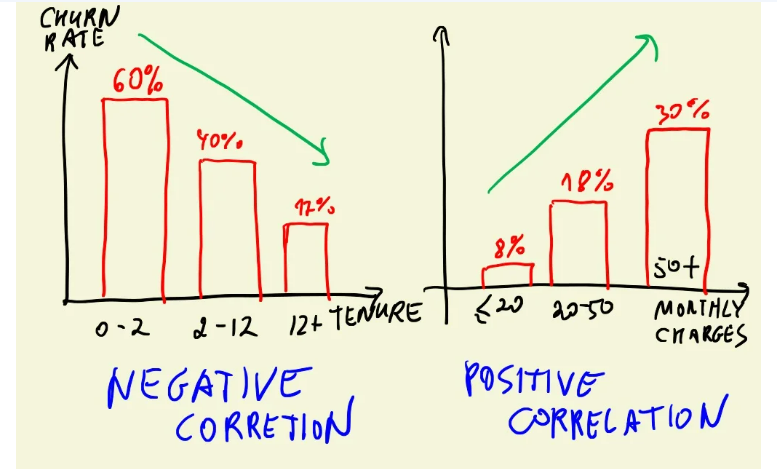

In [50]:
# the absolute correlation can be found out
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

### 3.7 One-hot coding
+ here we will check how categorical variables will affect our target variable
+ converting categorical variables into numerical variables (binary) is called as one hot coding

In this example, we can create a matrix with our two categorical variables including gender and contract
In the first matrix, we have gender and contract columns filled with F/M and 2Y, 1Y values
In the second matrix, we will use these values as column names and fill them with 0 & 1

+ the name hot comes from the activation/deactivation of the values i.e., the values in the second matrix are activated by placing one and deactivated by placing 0

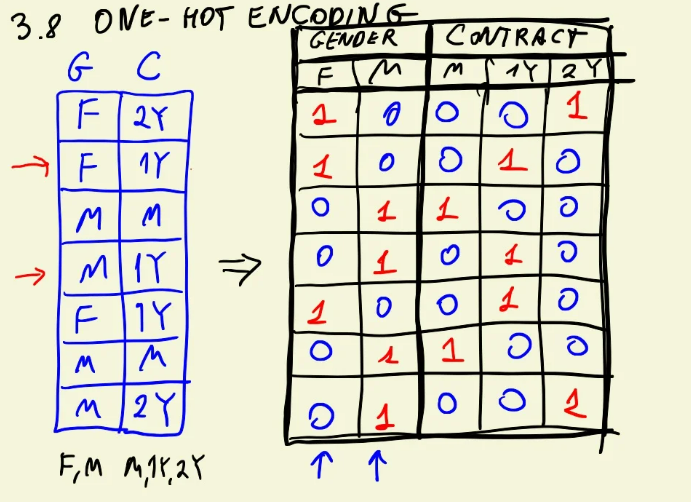

+ this way of coding variables is called as one hot coding

In [51]:
# we will use DictVectorizer from scikit learn
# in dictvectorises, the input transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays

from sklearn.feature_extraction import DictVectorizer

In [52]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [53]:
# turing row records into dictionary. We want to make vectors out of a dictionary using a dictionary vectorizer.
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [54]:
# basically we take a dictionary and turn it into a vector
dv = DictVectorizer(sparse = False)

In [55]:
# we train our dict vectoriser (we show it how our data looks like and then dict vectoriser will learn how our data is organised )
dv.fit(dicts)

DictVectorizer(sparse=False)

In [56]:
# by looking at these names, we can figure out what data columns are
dv.get_feature_names()

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

#### one hot encoding feature matrix

In [57]:
dv.transform(dicts)
# transforming our vectoriser into sparse matrix which is a special way to encoding data when there are many zeors
# sparse matrix is a way to transform 
# this created five columns (first three for contract and last two for gender)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

+ To summarise, first we convereted our data frames into dictionaries
+ then, we feed our dict vectoriser by showing it the dictionaries, it infers what are the column names and values
+ based on this feed our dict vectoriser creates this one hot encoding feature matrix

In [58]:
# now if we feed our dict vectoriser a numcerical variable, it will not change it to binary variable (it keeps the original values)
dicts = df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [59]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)


DictVectorizer(sparse=False)

In [60]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [61]:
# dict vectoriser turned tenure into numerical variable (it did not go through any transformation)
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [62]:
# now let's apply dict vectoriser for all numerical and categorical variables
train_dicts = df_train[categorical+numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [63]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [64]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [65]:
# applying transformation
list(dv.transform(train_dicts[:5])[0])
# this results in mixed on hot encoded variables & some numerical variables

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [66]:
# putting everything together
train_dicts = df_train[categorical+numerical].to_dict(orient='records')
dv= DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [67]:
# applying the same to the validation set
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

#### summary
+ Take all variables(categorical+numerical) & put them into dictionaries
+ Feed the dict vectoriser to teach it what kind of values are there
+ Transform these dictionaries into feature matrix
+ This feature matrix is then used for training and validation set by applying transformation

## 3.7 Logistic regression

$g_{(x_i)}$  = $y_{i}$

+ g is the model, y is the target variable
+ depending on the type of y, we can have different types of supervised machine learning 
+ we have either regression or classificaton
+ classification can further be either binary or multiclass

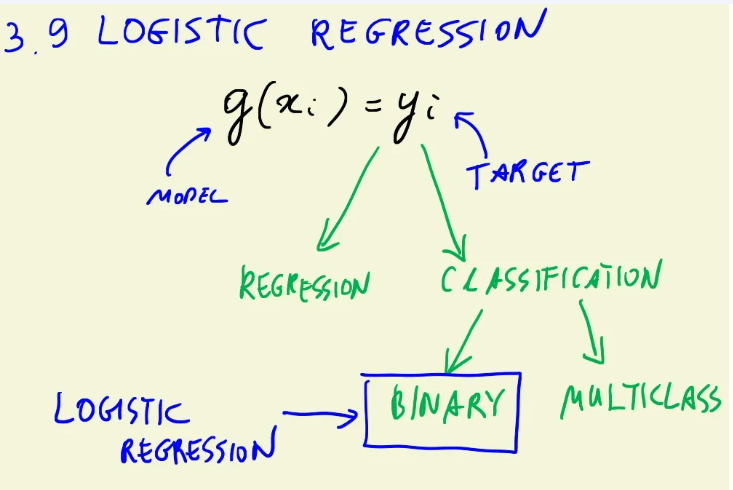

+ Here we will focus on binary classification task which will be solved by logistic regression
+ Binary classification tasks can have negative (0) or positive (1) target values
+ the output of these models is the probability of xi belonging to the positive class
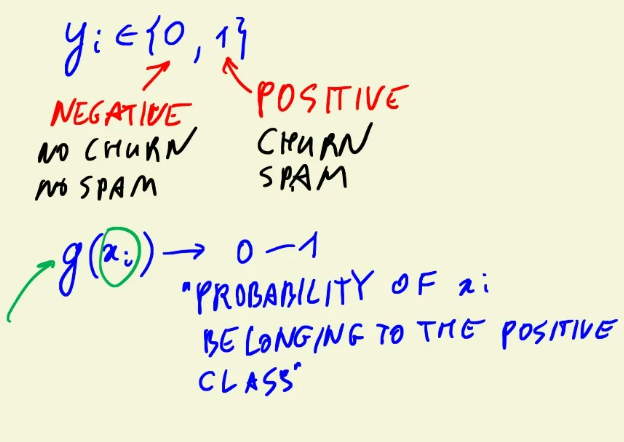


+ Logistic regression works similarly to linear regression as both models take into account the bias term and weighted sum of features EXCEPT that the output of linear regression is a real number while logistic regression outputs a value between zero and one.
+ The output of logistic regression is product of application of the sigmoid function to the linear regression formula as follows:

$g_{(x_i)}$  = sigmoid ( $w_{0}$ + $w_{1} x_{1}$ + $w_{2} x_{2}$ + ....+ $w_{n} x_{n}$)

$$
   Sigmoid = \frac{1}{1+exp(-z)} 
$$

where z is the output

+ the sigmoid function allows transforming a score into a probability.

In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [69]:
z = np.linspace(-5, 5, 51)


In [70]:
sigmoid(10000)

1.0

In [71]:
sigmoid(10)
# the value will always be between 1 & 0

0.9999546021312976

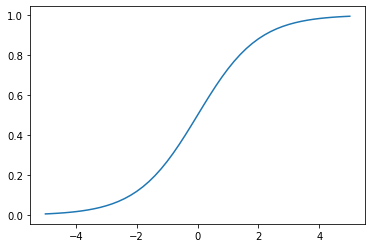

In [72]:
plt.plot(z, sigmoid(z))


In [73]:
# writing our logistic regression function
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

+ Thus, both regression & logistic regression use linear operations in terms of dot products
+ these models are fast to train, they have good qualities

## 3.8 Training a logistic regression with Scikit-Learn

+ **Train a model with Scikit-learn**

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [76]:
# this outputs in weights(w)/intercept
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [77]:
# intercept
model.intercept_[0]

-0.10907153920556581

In [78]:
# model prediction on trained set
# they are called ** hard predictions ** as they already have th eact lables i.e., 1 is churn & 0 is not churn
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [79]:
# soft predictions
model.predict_proba(X_train)

# it's a 2D matrix, first column denotes the probabiltiy of belonging to class 0 (probability of not churning) and 
# second one denotes the probabilty of belonging to class 1 (probability of churning)

array([[0.90442519, 0.09557481],
       [0.32075391, 0.67924609],
       [0.3664    , 0.6336    ],
       ...,
       [0.46840848, 0.53159152],
       [0.95750049, 0.04249951],
       [0.30139435, 0.69860565]])

**Train model on the validation set**

In [80]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899922, 0.20435726, 0.21203736, ..., 0.13638714, 0.79969074,
       0.83733007])

In [81]:
# define a threshold for a binary array
y_pred >= 0.5
# true means customer is churning, False means customer is not churning

array([False, False, False, ..., False,  True,  True])

In [82]:
churn_decision = (y_pred >= 0.5)

In [83]:
# now we will select all those customer which we think, are going to churn
df_val[churn_decision].customerid

# these customers will churn and they will get some promotional email 

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [84]:
y_val
# this array shows who will churn or not

array([0, 0, 0, ..., 0, 1, 1])

In [85]:
# but to see how many in total will churn or not, we will use this code

y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [86]:
# to see how many total will churn & match with our predictions
(y_val == churn_decision).mean()

# 80% will churn (our model is 80% correct)

0.8034066713981547

In [87]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [88]:
df_pred

,probability,prediction,actual
0,0.008999,0,0
1,0.204357,0,0
2,0.212037,0,0
3,0.542996,1,1
4,0.213615,0,0
...,...,...,...
1404,0.313509,0,0
1405,0.039358,0,1
1406,0.136387,0,0
1407,0.799691,1,1


In [89]:
# check how many of actual values align with our predictions
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [90]:
df_pred

,probability,prediction,actual,correct
0,0.008999,0,0,True
1,0.204357,0,0,True
2,0.212037,0,0,True
3,0.542996,1,1,True
4,0.213615,0,0,True
...,...,...,...,...
1404,0.313509,0,0,True
1405,0.039358,0,1,False
1406,0.136387,0,0,True
1407,0.799691,1,1,True


## 3.9 Model interpretation

In [91]:
#first let's see what zip function does -> it joins respective elements of two lists
a=[1,2,3,4]
b ='abcd'

list(zip(a,b))

# this can also be turned into dictionaries

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [92]:
#let's check weight for each feature (combine weights and features) & turn them into dictionaries
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [93]:
# this list is difficult to follow, so we will now train a smaller model
small = ['contract','tenure','monthlycharges'] # we will only use these features for our small model

In [94]:
df_train[small].iloc[:10]# taking look at the top ten values

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [95]:
# tunring it into dictionary
df_train[small].to_dict(orient='records')
# this will be used for the vectoriser

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [96]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [97]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [98]:
# check feature names
dv_small.get_feature_names()

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [99]:
X_train_small = dv_small.transform(dicts_train_small) # getting the feature matrix

In [100]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [101]:
# get coefficients
w0 = model_small.intercept_[0]
w0

-2.476775658711709

In [102]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [103]:
# adding weight to its corresponding feature
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

*Making sense of these weights

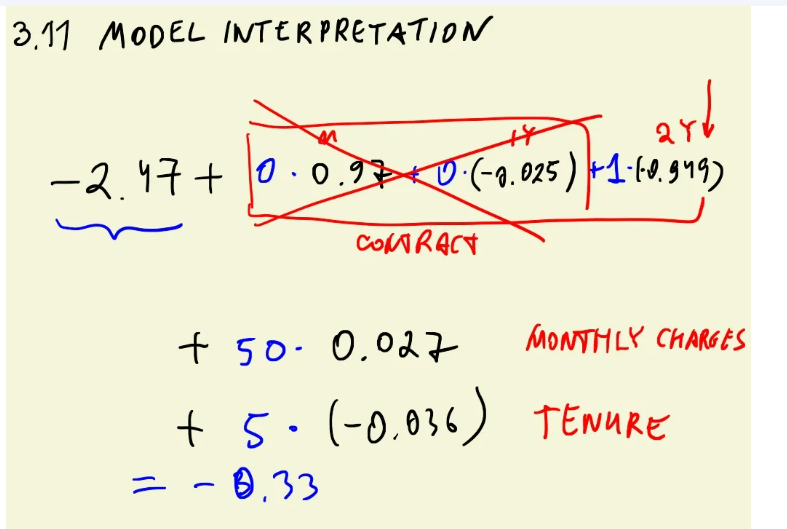

first we will start with our biased term (w0). This is the term that let us assume information about a customer wothout knowing anything else about them. w0 is what we assume about customer wihout knowing anything about them. Our biased term is -2.47, if we apply Sigmoid function to it, it will give us the probability of churning of a customer.
Thus, by default we assume that probability of somebody leaving the company is quite small.

In [104]:
sigmoid(-2.47)

0.07798823512936635

The next term is 0.97 which is the weight term of the customer who has monthly contract. Taking it's Sigmoid function gives us the probability of churning of this customer, which is higher than the biased term probability. 

In [105]:
sigmoid(-2.7 + 0.97)

0.1505875797458439

In [106]:
# the same customer who have to pay 50$ extra, their probabiity of churning becomes even higher
sigmoid(-2.7 + 0.97 + 50*0.027)

0.4061268970658573

In [107]:
# for each extra month the customer spends with the company (tenure), their score becomes smaller (that's why the feature weight of tenure is in negative)
# thus, longer a customer stays with the company, their probability of churning becomes less
# the negative feature can be interpreted that it is less likely that customer will churn if they already have year/two year contract with company

sigmoid(-2.47 + 0.97 + 50*0.027 + 5* (-0.036))

0.41824062315816374

In [108]:
# let's look at the raw score
-2.47 + 0.97 + 50*0.027 + 5* (-0.036)

# the raw score for this specific customer is -0.33

-0.3300000000000001

In [109]:
# the Sigmoid outputs :
sigmoid(_) # the _ outputs the sigmoid of previous value

# this is a positive value and we know that the customer is going to churn

0.41824062315816374

In [110]:
# let's change some values
# let's say a customer is on 2 year contract & they have to pay 30$ per month

-2.47 + 0.97 +30 *0.027 + 24* (-0.036)

# the probability score is negative, thus, probability of this customer churning is very low

-1.5540000000000003

In summay, looking at the feature weights:

we can say that if there are negative weigth ('contract=one_year': -0.025,'contract=two_year': -0.949,) this means the customers who have this kind of contract, tend to churn less.

In oppostive, customers who have monthly contract (high weight value) tend to churn more.

## 3.10 Using the model

In [111]:
# get big model with all features 
# first get dictionaries - > then get feature matrix from these dictionaries -> train model on these feature matrix
# we will do the same on the test set-> we will get predictions -> calculate accuracy

dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')


In [112]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [113]:
# create dict vectoriser
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [114]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [115]:
# same for the test datset
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [116]:
X_test = dv.fit_transform(dicts_test)


In [117]:
# apply model
y_pred = model.predict_proba(X_test)[:,1]

In [118]:
churn_decision = (y_pred >= 0.5) # for all clients with probability higher than 0.5

In [119]:
# accuracy
(churn_decision == y_test).mean()

# this is slightly more accurate than what we get on the validation dataset

0.815471965933286

In [120]:
# let's apply this model to one customer
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [121]:
x_small = dv.transform([customer])

In [122]:
model.predict_proba(x_small)

array([[0.5943189, 0.4056811]])

In [123]:
model.predict_proba(x_small)[0,1]
# there is 40% probability that this customer is not churning
# thus, we will not send him promotinal email

0.40568109779885553

In [124]:
y_test[0]

0

Summary:

+ We built a model for predicting churn (i.e., whether customer will churn or not)
+ after preparing data, we set up the validation framework (i.e.g, divide data into train/test/split using Scikit-Learn)
+ EDA, we investigated feature importance. Each feature informs us that how likely each customer in a particular group are likely to churn
+ One-hot coding is a way to encode categorical variables, we use dict vectoriser from Scikit-Learn to implement it
+ Logisitc- regression is similar to linear regression but it uses Sigmoid function to calculate the output (ranges b/w 0 &1)
+ Output of log reg is in terms of probability